<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Préparation-de-l'espace-de-travail" data-toc-modified-id="Préparation-de-l'espace-de-travail-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Préparation de l'espace de travail</a></span></li><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#Amélioration-de-la-transformation-du-jeu-de-données-:-équilibrage-None/book" data-toc-modified-id="Amélioration-de-la-transformation-du-jeu-de-données-:-équilibrage-None/book-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Amélioration de la transformation du jeu de données : équilibrage None/book</a></span></li><li><span><a href="#Test-App-après-équilibrage-None/book" data-toc-modified-id="Test-App-après-équilibrage-None/book-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test App après équilibrage None/book</a></span></li><li><span><a href="#Test-du-modèle" data-toc-modified-id="Test-du-modèle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Test du modèle</a></span><ul class="toc-item"><li><span><a href="#Test-pour-une-phrase" data-toc-modified-id="Test-pour-une-phrase-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Test pour une phrase</a></span></li><li><span><a href="#Evaluation-avec-le-jeu-de-données-test" data-toc-modified-id="Evaluation-avec-le-jeu-de-données-test-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluation avec le jeu de données test</a></span><ul class="toc-item"><li><span><a href="#Capacité-du-modèle-à-prédire-la-bonne-intention" data-toc-modified-id="Capacité-du-modèle-à-prédire-la-bonne-intention-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Capacité du modèle à prédire la bonne intention</a></span></li><li><span><a href="#Capacité-du-modèle-à-prédire-les-bonnes-entités" data-toc-modified-id="Capacité-du-modèle-à-prédire-les-bonnes-entités-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Capacité du modèle à prédire les bonnes entités</a></span></li></ul></li></ul></li></ul></div>

# Préparation de l'espace de travail

Nous ajoutons les bibliothèques de client au fichier Python.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from collections import defaultdict

In [1]:
from azure.cognitiveservices.language.luis.authoring import LUISAuthoringClient
from azure.cognitiveservices.language.luis.authoring.models import ApplicationCreateObject
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials

import json, time, uuid, urllib, zipfile, os

from my_luis import *  # Importe les fonctions personnalisées du projet LUIS

Ressources pour la suite du notebook : 
    
- https://docs.microsoft.com/fr-fr/azure/cognitive-services/luis/client-libraries-rest-api?tabs=windows&pivots=programming-language-python

# Chargement des données

In [6]:
url_oc = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+10%C2%A0-+D%C3%A9veloppez+un+chatbot+pour+r%C3%A9server+des+vacances/frames.zip"
nom_fichier = "frames.json"

In [8]:
frames = load_and_transform(url_oc,nom_fichier,chemin_fichier)

Le téléchargement de vos données a commencé.
Le téléchargement des données est terminé.


In [9]:
frames[0]

{'user_id': 'U22HTHYNP',
 'turns': [{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
   'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
      'name': 'inform'},
     {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
       {'val': 'Caprica', 'key': 'or_city'},
       {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
       {'val': '8', 'key': 'n_adults'},
       {'val': '1700', 'key': 'budget'}],
      'name': 'inform'}],
    'active_frame': 1,
    'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
 

# Amélioration de la transformation du jeu de données : équilibrage None/book

In [19]:
liste_entites = ['dst_city','or_city','str_date','end_date','budget']

df = frames_to_df(
    frames,
    "book",
    liste_entites
)
    
df.shape

(10407, 4)

In [20]:
df.head(5)

,text,intent_name,entity_labels,nombre_entites
0,i'd like to book a trip to atlantis from capri...,book,"[{'entity_name': 'dst_city', 'start_char_index...",4
1,"yes, how about going to neverland from caprica...",None,"[{'entity_name': 'dst_city', 'start_char_index...",4
2,i have no flexibility for dates... but i can l...,None,"[{'entity_name': 'or_city', 'start_char_index'...",2
3,i suppose i'll speak with my husband to see if...,None,[],0
4,"hello, i am looking to book a vacation from go...",book,"[{'entity_name': 'dst_city', 'start_char_index...",3


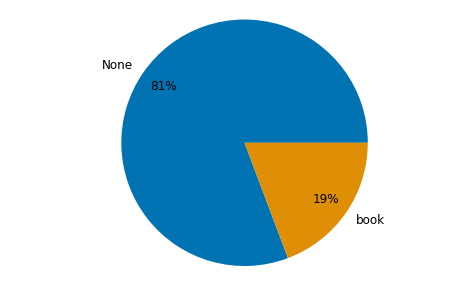

In [22]:
pie_df(df, 'intent_name')

In [23]:
# On supprime les doublons
df = df.drop_duplicates(["text"])
df.shape

(9568, 4)

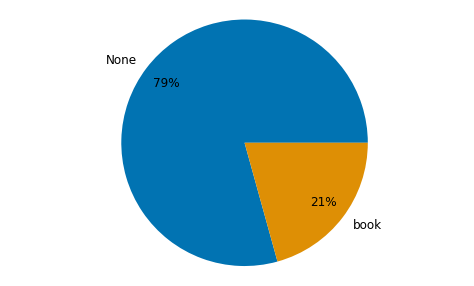

In [24]:
pie_df(df, 'intent_name')

D'abord nous allons vérifier si les intent_name "None" n'ont bien aucune entités dans leur texte.

In [25]:
data = df[df['intent_name'] == 'None']

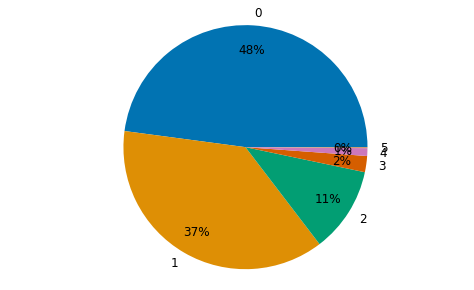

In [26]:
pie_df(data, 'nombre_entites')

Nous voyons qu'il n'y a qu'une moitié des textes labélisés comme "None" qui apparaissent n'ont pas du tout d'entités labélisées.

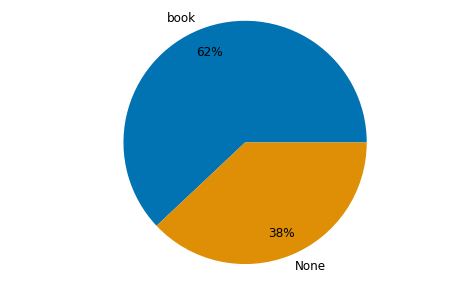

In [27]:
condition = (df["intent_name"] == "None") & (df["nombre_entites"] > 0)
df.loc[condition, "intent_name"] = "book"

pie_df(df, 'intent_name')

Nous allons tester à nouveau notre application.

# Test App après équilibrage None/book

In [28]:
frames = df[["text", "intent_name", "entity_labels"]].to_dict("records")

In [29]:
frames

[{'text': "i'd like to book a trip to atlantis from caprica on saturday, august 13, 2016 for 8 adults. i have a tight budget of 1700.",
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 27,
    'end_char_index': 34},
   {'entity_name': 'or_city', 'start_char_index': 41, 'end_char_index': 47},
   {'entity_name': 'str_date', 'start_char_index': 52, 'end_char_index': 76},
   {'entity_name': 'budget', 'start_char_index': 117, 'end_char_index': 120}]},
 {'text': 'yes, how about going to neverland from caprica on august 13, 2016 for 5 adults. for this trip, my budget would be 1900.',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 24,
    'end_char_index': 32},
   {'entity_name': 'budget', 'start_char_index': 114, 'end_char_index': 117},
   {'entity_name': 'or_city', 'start_char_index': 39, 'end_char_index': 45},
   {'entity_name': 'str_date', 'start_char_index': 50, 'end_char_index': 64}]},
 {'te

In [30]:
load_dotenv('api.env')

authoringKey = os.environ["LUIS_AUTHORING_SUBSCRIPTION_KEY"]
authoringEndpoint = os.environ["LUIS_AUTHORING_ENDPOINT"]

In [35]:
app_id, test_data = creation_app(frames, authoringKey, authoringEndpoint)

Created LUIS app with ID 77452189-7e0a-4306-b207-e05defa1c498
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
Waiting 10 seconds for training to complete...
trained


# Test du modèle

In [1]:
PREDICTION_KEY = os.environ["PREDICTION_KEY"]
PREDICTION_ENDPOINT = os.environ["PREDICTION_ENDPOINT"]

clientRuntime  = LUISRuntimeClient(
        PREDICTION_ENDPOINT,
        CognitiveServicesCredentials(PREDICTION_KEY),
    )

## Test pour une phrase

In [73]:
test_data

[{'text': 'well of course business class yes go ahead send paris the bill lol',
  'intent_name': 'book',
  'entity_labels': []},
 {'text': 'my assistant and i want to get to ciudad juarez over the next couple weeks to take care of a little chihuahua',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 34,
    'end_char_index': 46}]},
 {'text': 'between the 9th and the 23rd of september; and i can leave from anywhere',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 12,
    'end_char_index': 14},
   {'entity_name': 'end_date', 'start_char_index': 24, 'end_char_index': 40}]},
 {'text': 'uunder 3200 please',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'budget',
    'start_char_index': 7,
    'end_char_index': 10}]},
 {'text': 'there is no park nearby though is there?',
  'intent_name': 'None',
  'entity_labels': []},
 {'text': 'are there any other ones?',
  'intent_name': 'None'

In [74]:
request = { "query" : "hey there, i'd love a trip from recife to barcelona please, can you help  me?" }

In [75]:
result = clientRuntime.prediction.get_slot_prediction(app_id=app_id, slot_name="production", prediction_request = request
        )

In [76]:
result.prediction.entities      

{'or_city': ['recife'], 'dst_city': ['barcelona']}

In [77]:
result.prediction.top_intent

'book'

In [78]:
result.prediction.intents

{'book': <azure.cognitiveservices.language.luis.runtime.models._models_py3.Intent at 0x200503b8e50>}

## Evaluation avec le jeu de données test

### Capacité du modèle à prédire la bonne intention

In [79]:
test_data[0]

{'text': 'well of course business class yes go ahead send paris the bill lol',
 'intent_name': 'book',
 'entity_labels': []}

In [80]:
len(test_data)

999

In [82]:
df_intention = df_prediction_intention(test_data)
df_intention

,Texte,Intention Cible,Intention Prediction
0,well of course business class yes go ahead sen...,book,book
1,my assistant and i want to get to ciudad juare...,book,book
2,between the 9th and the 23rd of september; and...,book,book
3,uunder 3200 please,book,book
4,there is no park nearby though is there?,None,None
...,...,...,...
994,i need to book a trip for the whole family fro...,book,book
995,"5 adults and 7 kids! yup, the lot of us. we wa...",book,None
996,oh yes! between september 12 and 26!,book,book
997,"that sounds amazing, and it's within those dat...",None,None


Accuracy = 0.93
Recall = 0.93
Precision = 0.96


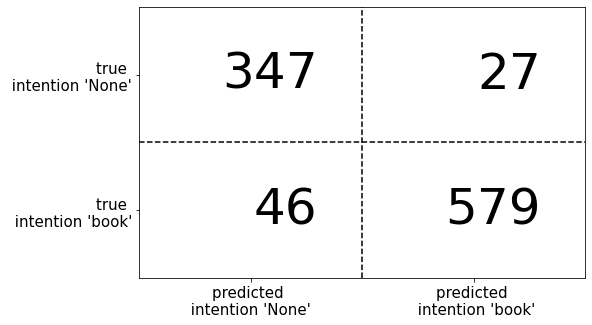

In [84]:
matrice_confusion_intention(df_intention)

### Capacité du modèle à prédire les bonnes entités

In [85]:
test_data

[{'text': 'well of course business class yes go ahead send paris the bill lol',
  'intent_name': 'book',
  'entity_labels': []},
 {'text': 'my assistant and i want to get to ciudad juarez over the next couple weeks to take care of a little chihuahua',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'dst_city',
    'start_char_index': 34,
    'end_char_index': 46}]},
 {'text': 'between the 9th and the 23rd of september; and i can leave from anywhere',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'str_date',
    'start_char_index': 12,
    'end_char_index': 14},
   {'entity_name': 'end_date', 'start_char_index': 24, 'end_char_index': 40}]},
 {'text': 'uunder 3200 please',
  'intent_name': 'book',
  'entity_labels': [{'entity_name': 'budget',
    'start_char_index': 7,
    'end_char_index': 10}]},
 {'text': 'there is no park nearby though is there?',
  'intent_name': 'None',
  'entity_labels': []},
 {'text': 'are there any other ones?',
  'intent_name': 'None'

In [86]:
request = { "query" : "hey there, i'd love a trip from recife to barcelona please, can you help  me?" }

In [87]:
result = clientRuntime.prediction.get_slot_prediction(app_id=app_id, slot_name="production", prediction_request = request
        )

In [88]:
result.prediction.entities      

{'or_city': ['recife'], 'dst_city': ['barcelona']}

In [90]:
for i in range(20):
    df = df_prediction_entites_un_texte(i, print_reponse='oui')
    df

Il n'y a pas d'entité cible pour le texte: well of course business class yes go ahead send paris the bill lol
-------------------------------------------------------------
La précision de la prédiction sur les entités est de 1.0 
pour le texte : my assistant and i want to get to ciudad juarez over the next couple weeks to take care of a little chihuahua
-------------------------------------------------------------
La précision de la prédiction sur les entités est de 1.0 
pour le texte : between the 9th and the 23rd of september; and i can leave from anywhere
-------------------------------------------------------------
La précision de la prédiction sur les entités est de 1.0 
pour le texte : uunder 3200 please
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: there is no park nearby though is there?
-------------------------------------------------------------
Il n'y a pas d'entité cible pour le texte: are there any other ones?
---

In [92]:
df = df_precision_entites(test_data)
df

La précision de la prédiction sur les entités est de 0.87


,Entités_cible,Valeurs_cible,Valeurs_prediction
0,dst_city,ciudad juarez,ciudad juarez
1,str_date,9th,9th
2,end_date,23rd of september,23rd of september
3,budget,3200,3200
4,dst_city,naples,naples
...,...,...,...
747,str_date,september 12th,e
748,or_city,tampa,tampa
749,budget,32800,32800
750,str_date,september 12,september 12


La précision de la prédiction sur les entités est de 0.87
La précision sur la prédiction des intentions est: 0.93 
La précision sur la prédiction des entités est: 0.87


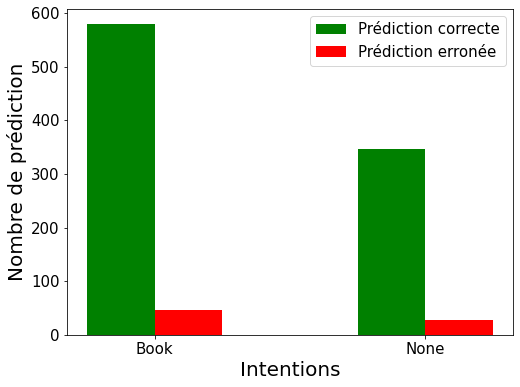

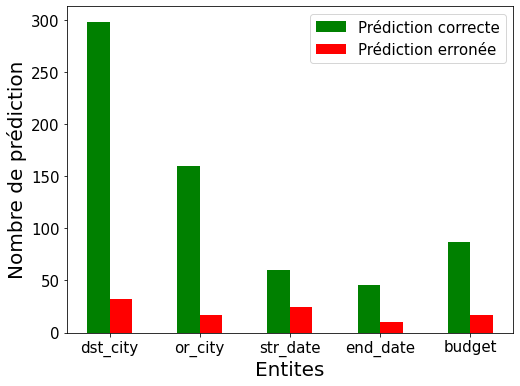

In [95]:
df_intention, df_entites = visualisation(test_data)